# Rethink Breast Cancer Data - Yuqing Wu 93914

In this assignment, I will analyze and model the breast cancer data based on 2 principles: 

1. What can be improved from the previous analysis and modeling;
2. What new methods can be tested.

## Part I Data Analyis

Step 0. Import the nacessary libraries and import the data

In [31]:
# Import the nacessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import pyplot
import seaborn as sns

In [32]:
# loading the raw data
data=pd.read_csv("../data.csv")
data.head()  

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Some quick bullet points
1. id needs to be droped since  that cannot be used for classificaiton; 
2. Diagnosis is the target variable;
2. Unnamed: 32 feature: useless, all NaN;

I will go ahead and drop them

In [33]:
dropList = ["id", "diagnosis", "Unnamed: 32"]
y = data['diagnosis']
X = data.drop(dropList, axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Target Variable Distribution
Use countplot to show the distribution

Number of Benign:  357
Number of Malignant :  212


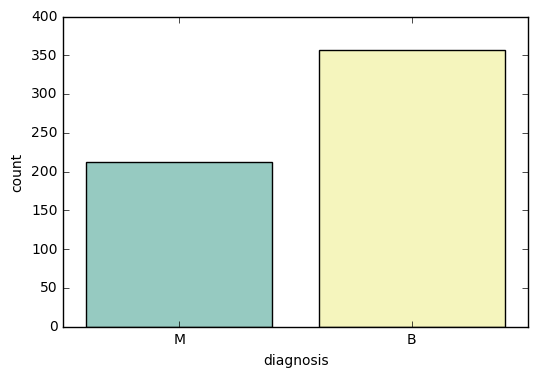

In [34]:
ax = sns.countplot(y,label="Count", palette="Set3")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
plt.show()


Before we visualize the data, I want to try a step I did not do in the previous analysises. I will standardize the data since I am sure the data will be in different numaric ranges. We can use the pd.describe mehtod to take a quick look.

In [35]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Here is the standardize method

In [36]:
data_1 = (X - X.mean()) / (X.std())   

In [37]:
data_1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.136331e-15,-6.558316e-15,-7.012551e-16,-8.339355e-16,6.120470e-15,-1.074321e-15,-4.031144e-16,1.006030e-15,-1.888550e-15,4.860396e-16,...,-2.346102e-15,1.761138e-15,-1.214416e-15,5.919889e-16,-5.033661e-15,-2.118204e-15,6.649631e-16,-1.795088e-16,-2.481734e-15,2.424930e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


# Data Visualization

I am going to explore four ways of ploting for this experiment:
1. Boxplot;
2. Pairplot;
3. Swamplot;
4. Correlation plot;

But first, we need to concatinate the data for the convenience plotting

## BoxPlot

Firstly let's take a look at the boxplot

In [38]:
testData = pd.concat([y,data_1],axis=1)

In [39]:
testData = pd.melt(testData,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))

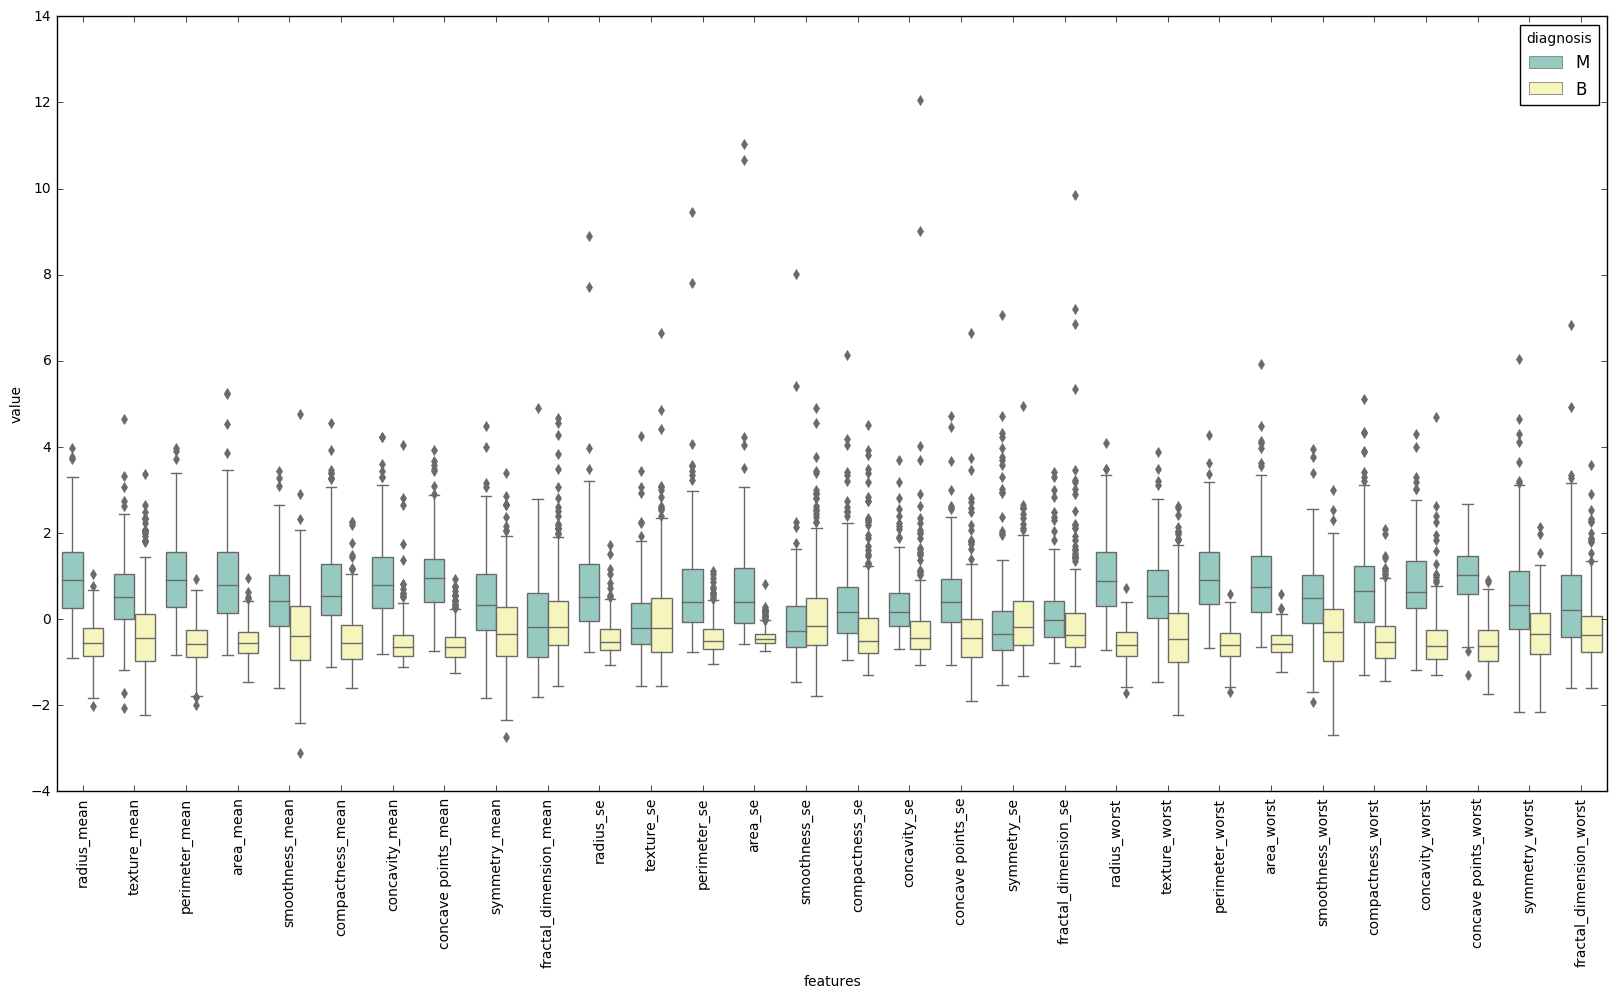

In [40]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=testData, palette="Set3")
plt.xticks(rotation=90)
plt.show()

From the plot we can find several facts:

1. In some features, we can tell they are somehow correlated. For example, **perimeter_mean** and **area_mean** are correlated. We will explore that more in the following plots.

2. We want to keep those features that will help us to differentiate the two target variable, and drop those are too close to each other.

## PairPlot

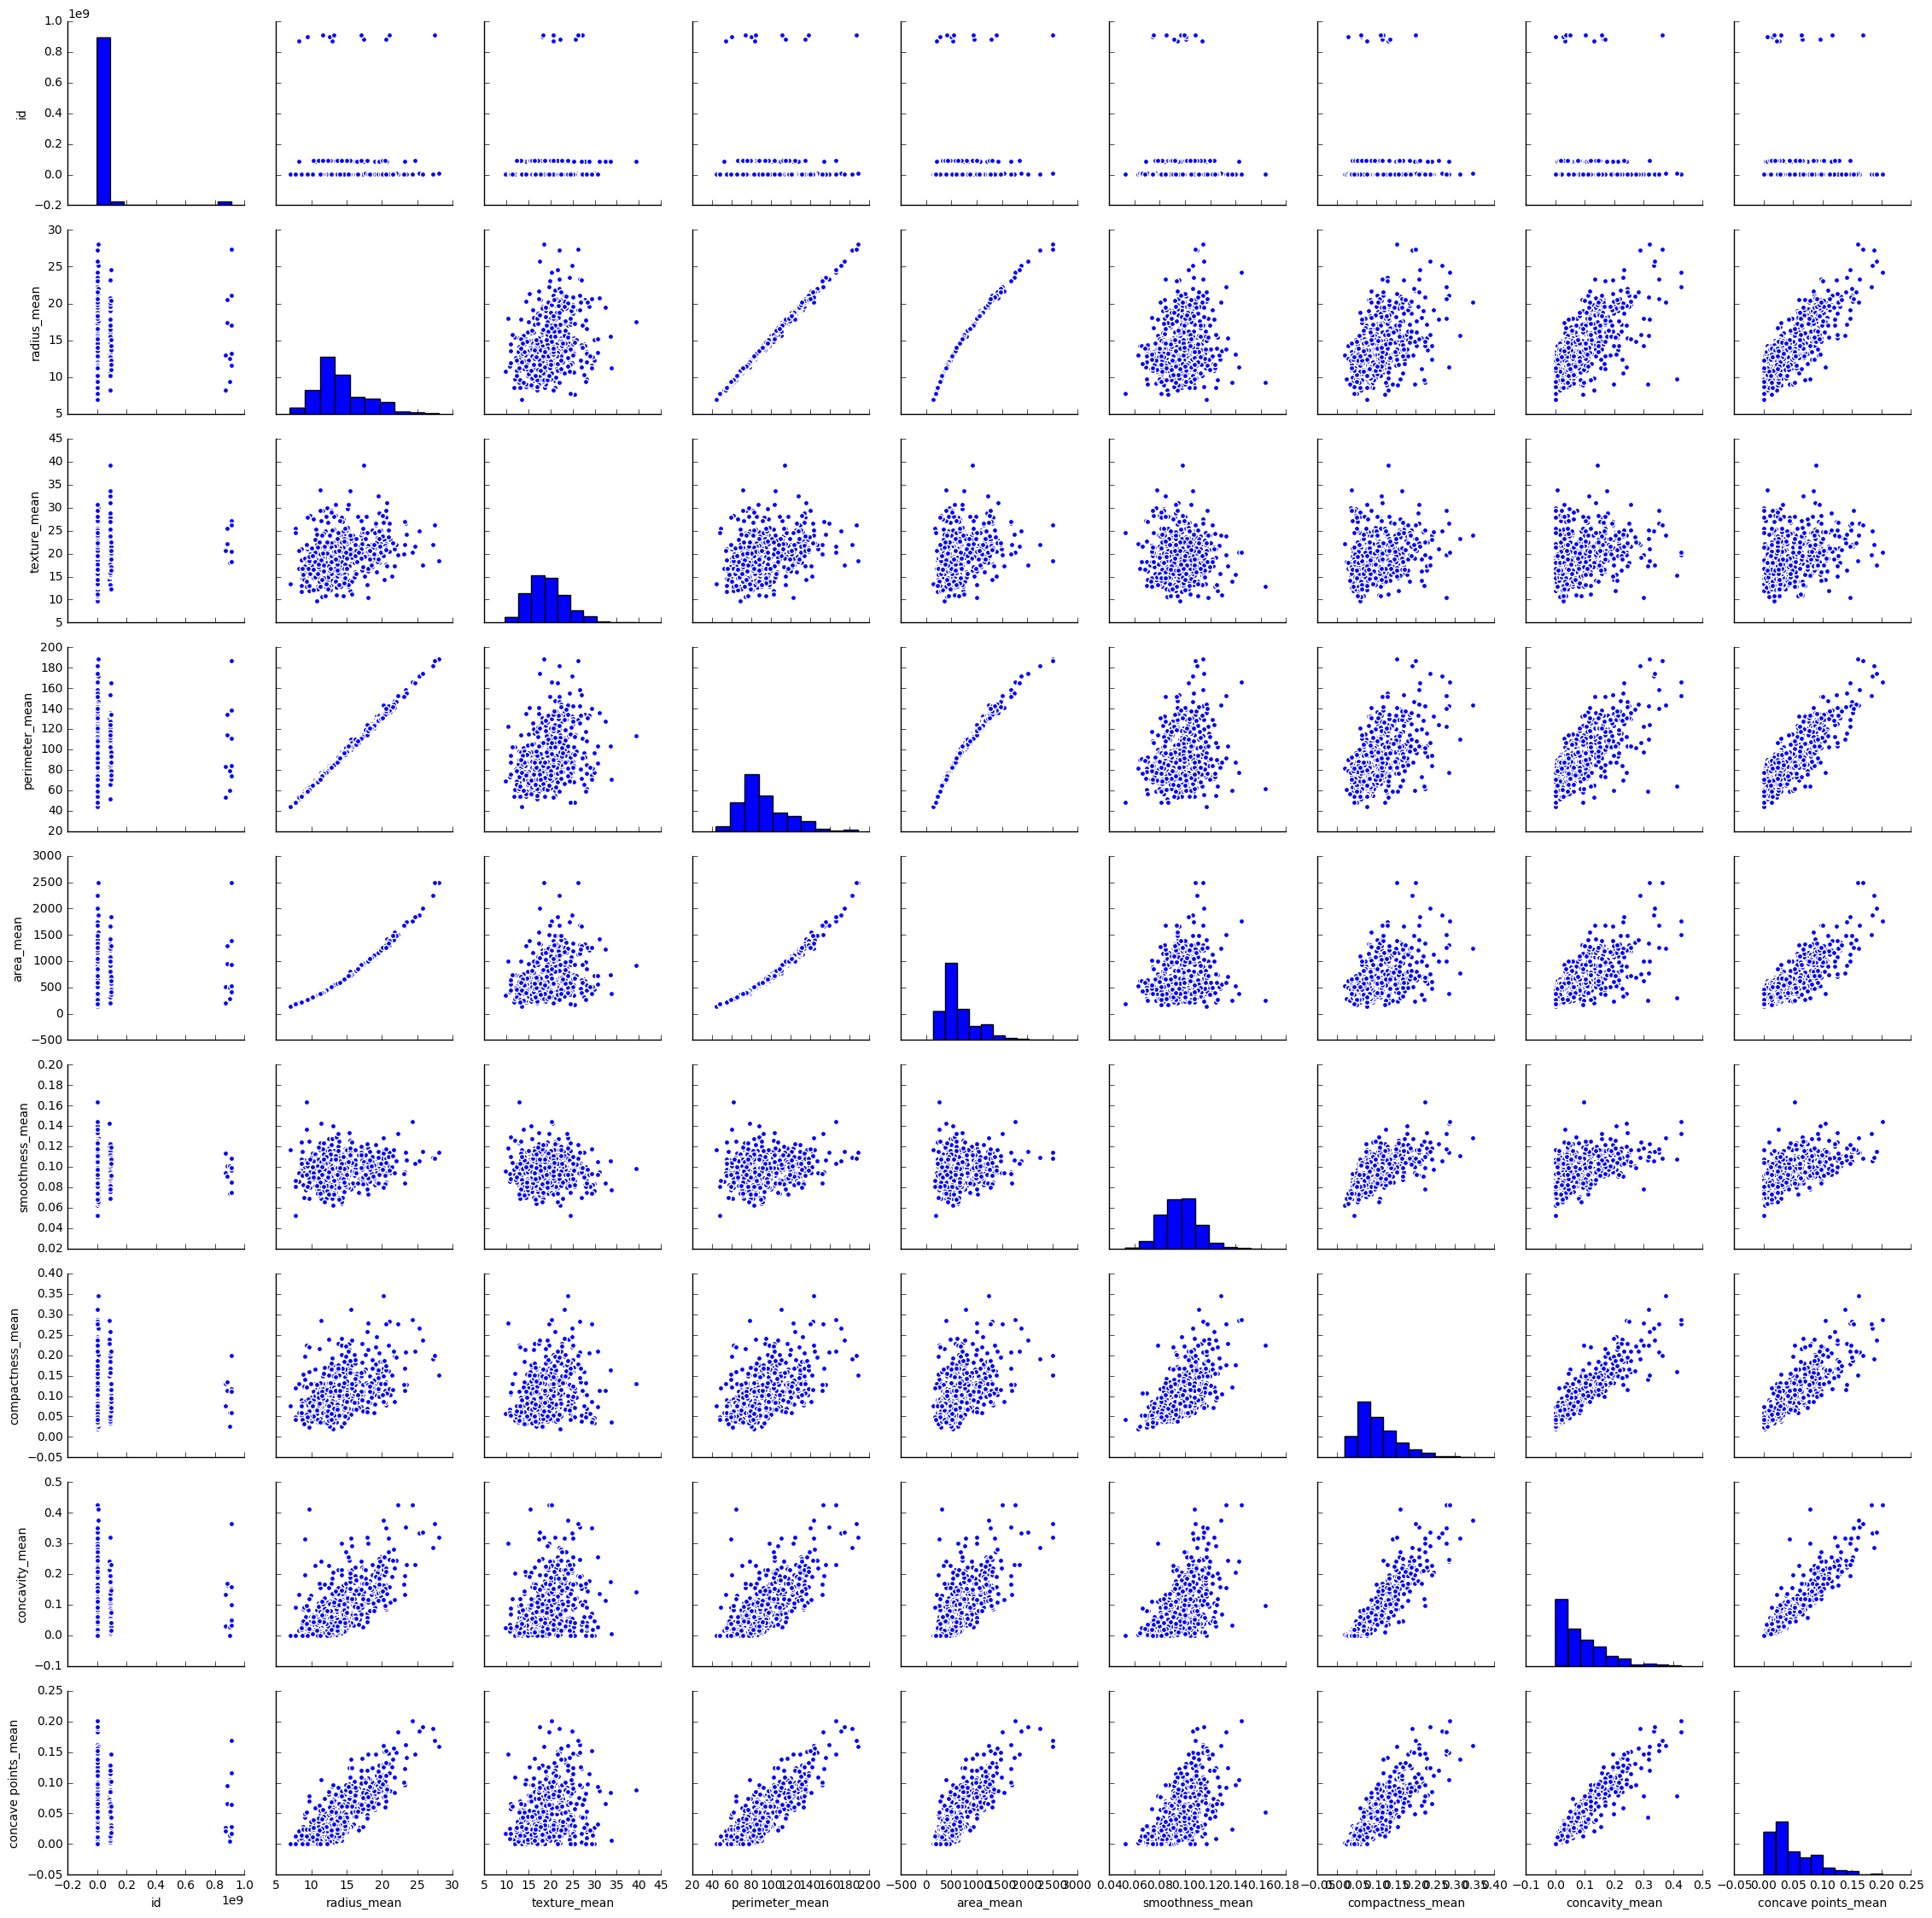

In [41]:
pairPlot = sns.pairplot(data[data.columns[0:10]], palette="Set3")
plt.show()

We can already see some data are highly correlated.

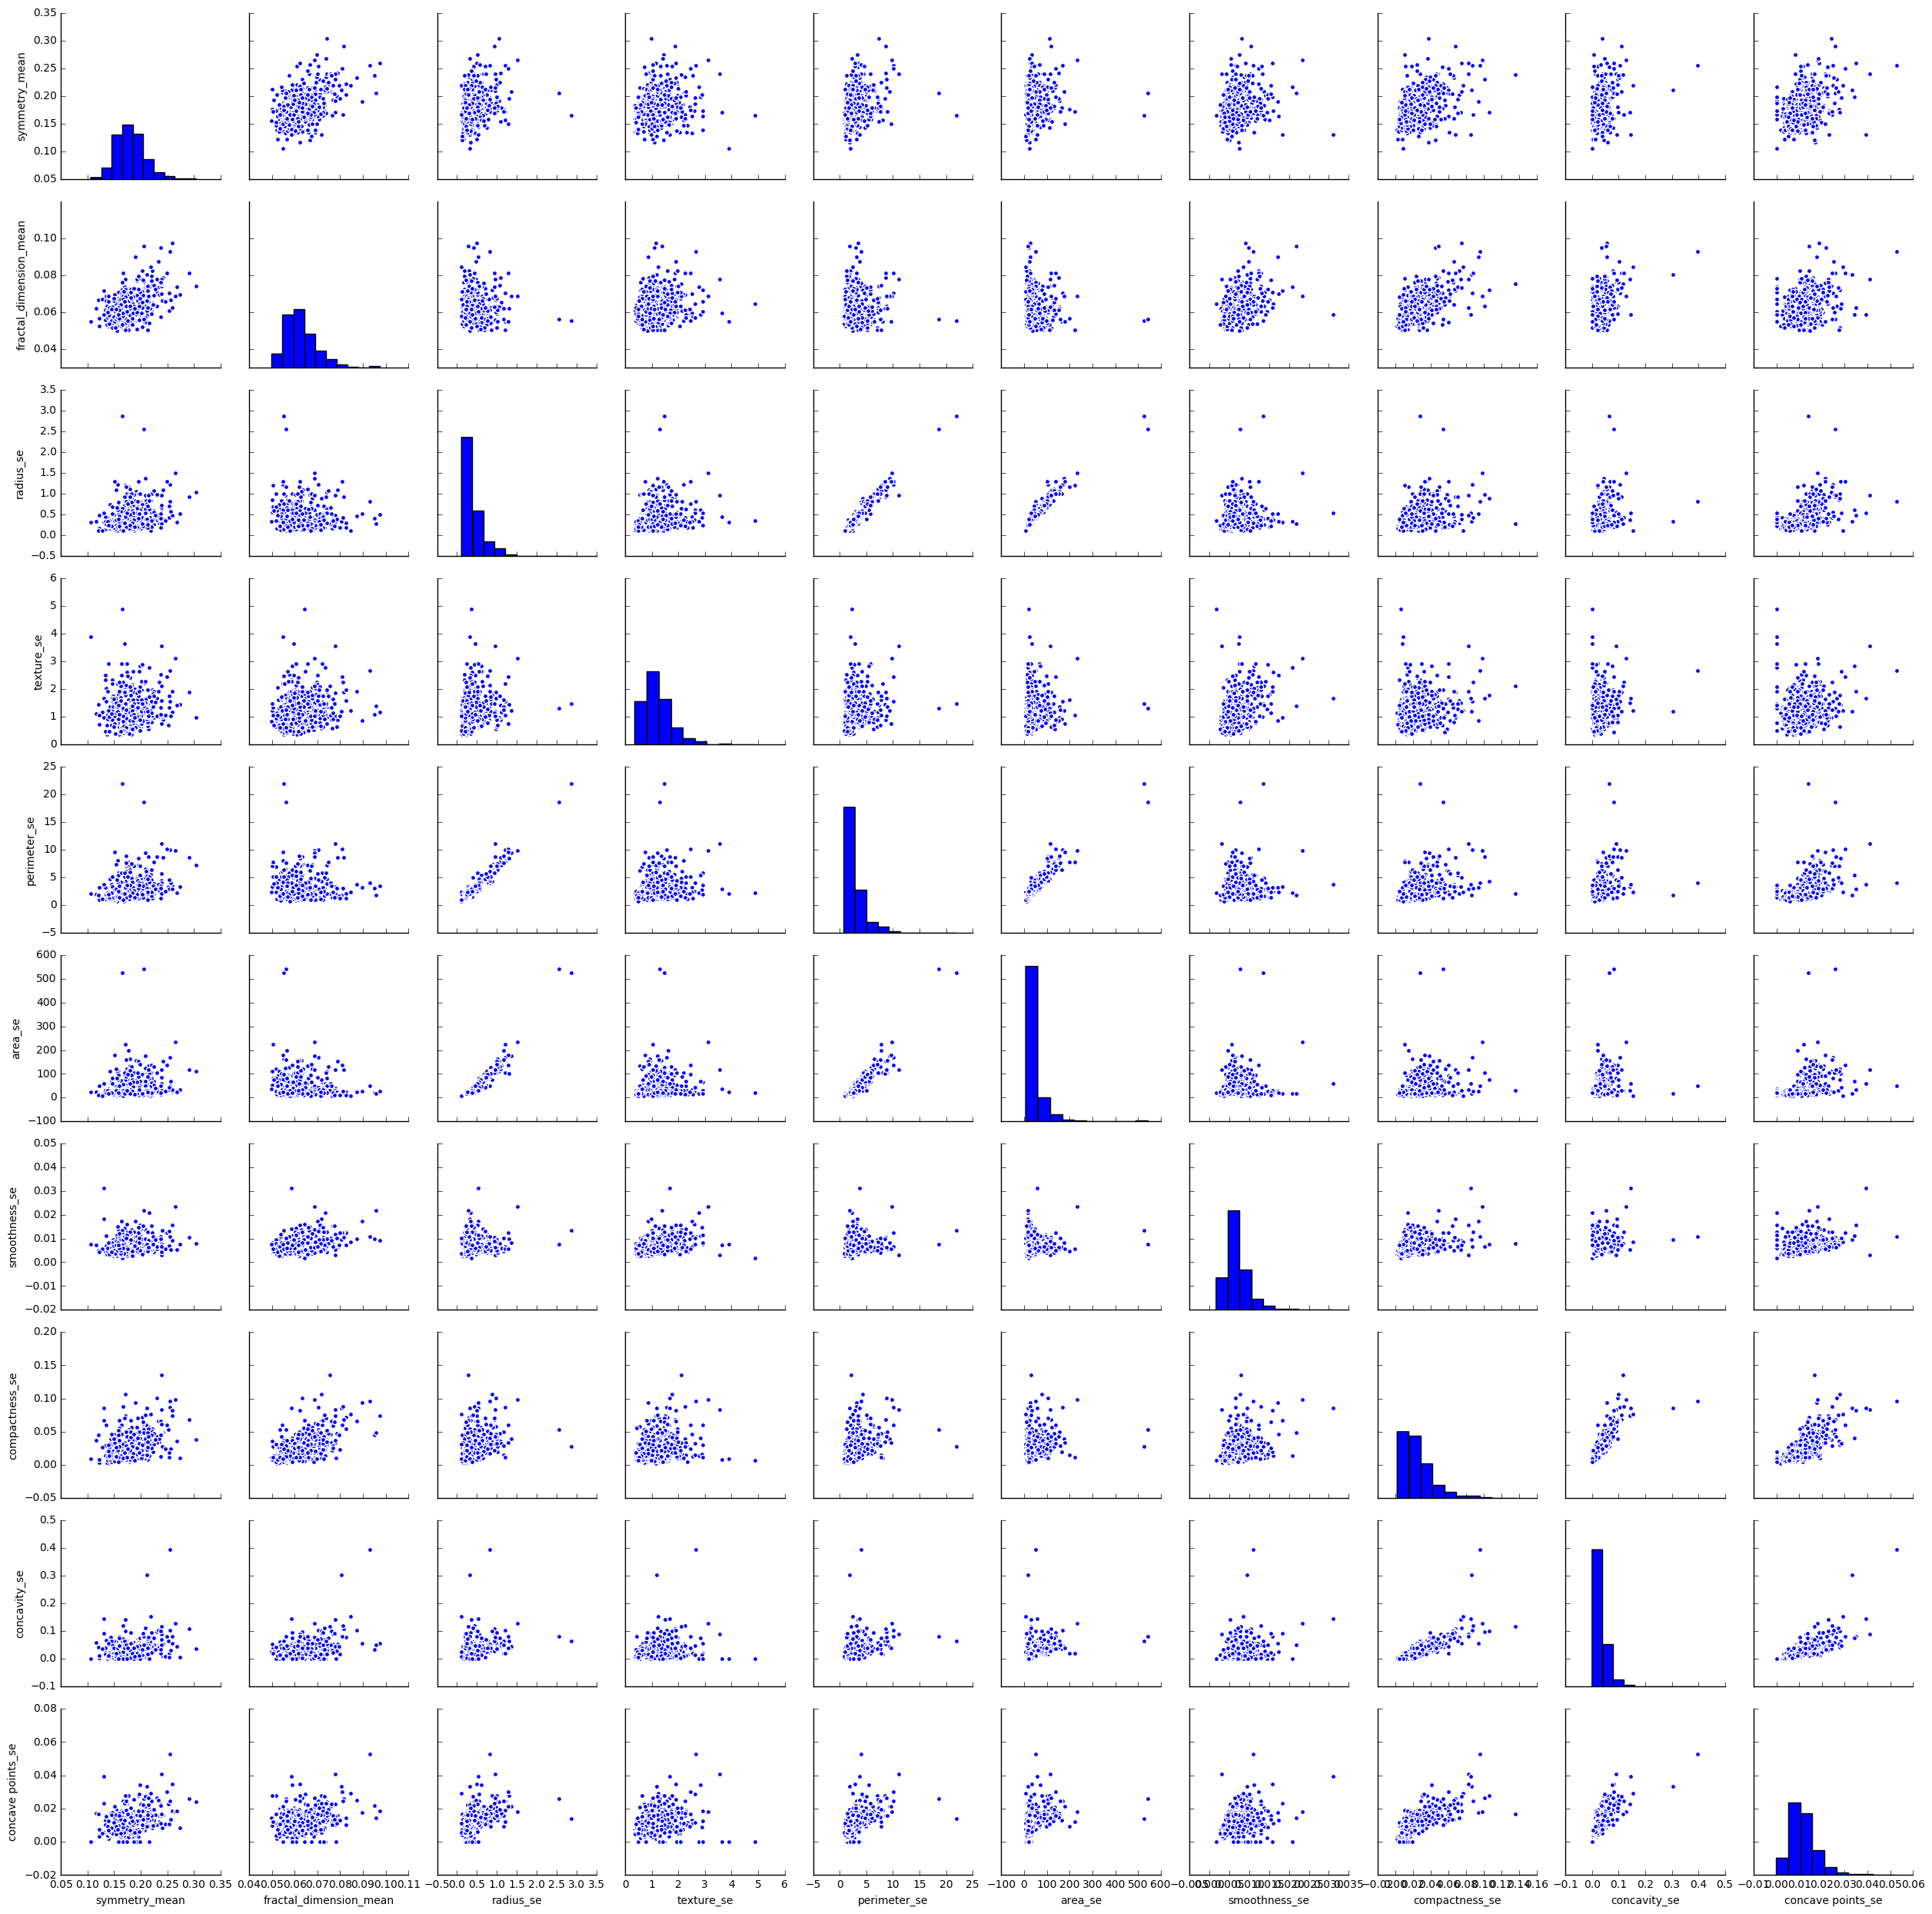

In [42]:
pairPlot = sns.pairplot(data[data.columns[10:20]], palette="Set3")
plt.show()

## SwarmPlot

In [43]:
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=testData)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

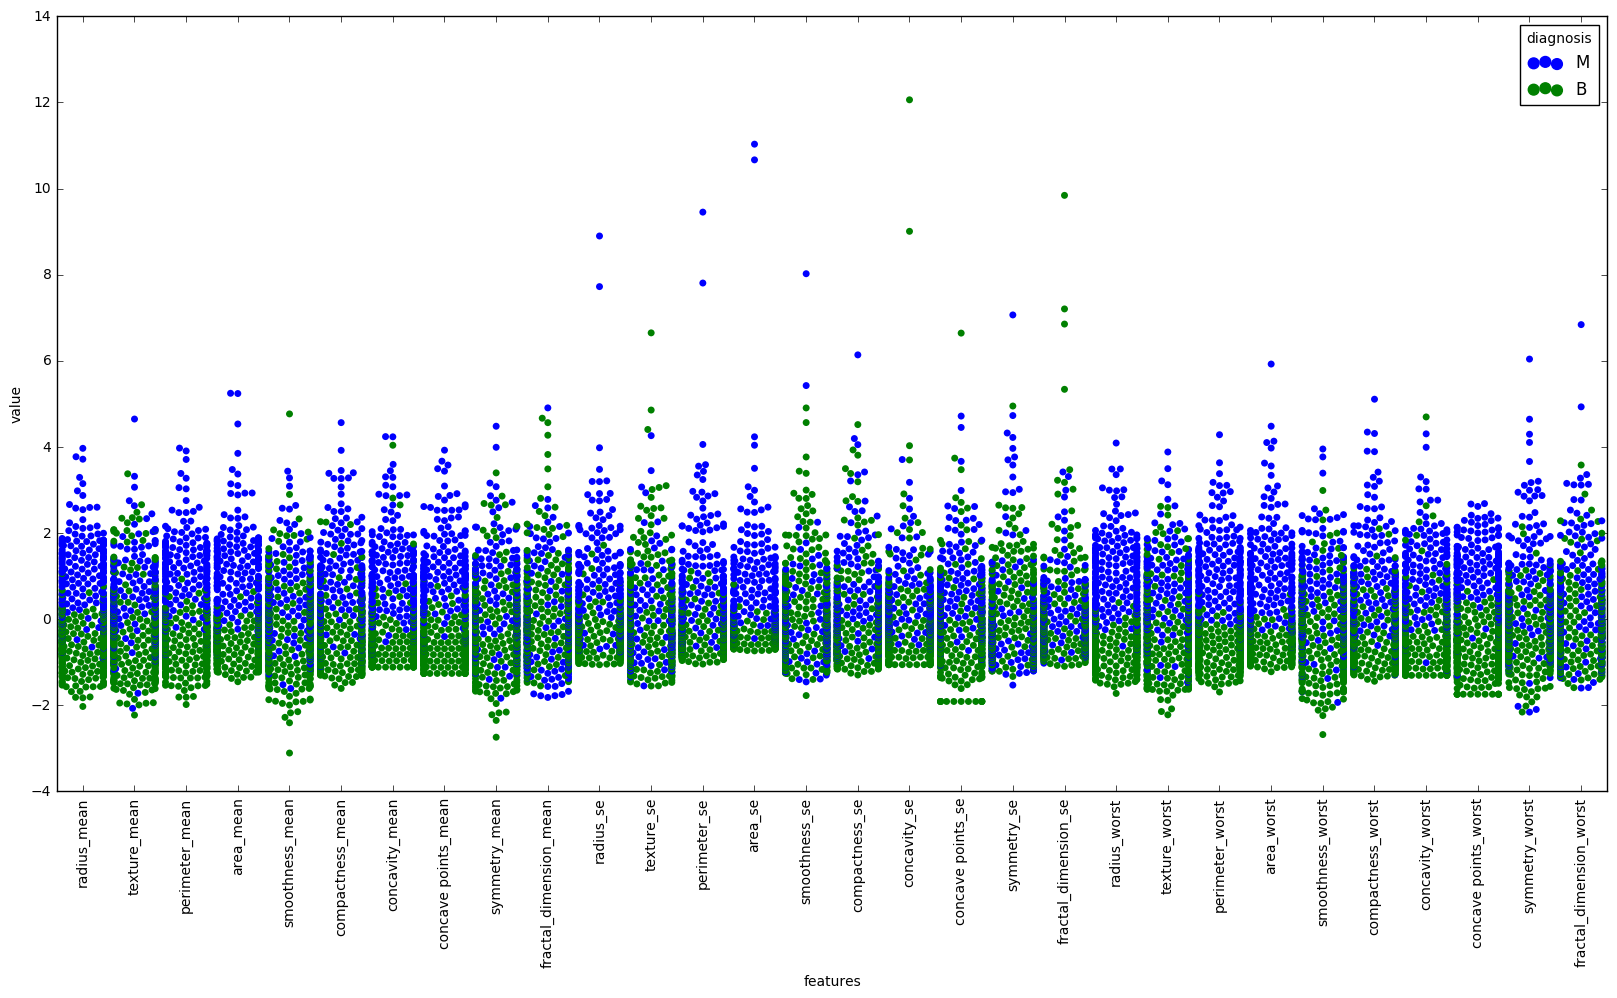

In [44]:
plt.show()

Lastly, we are going to identify those features that are highly correlated. Here we will apply correlation plot to find out.

In [45]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

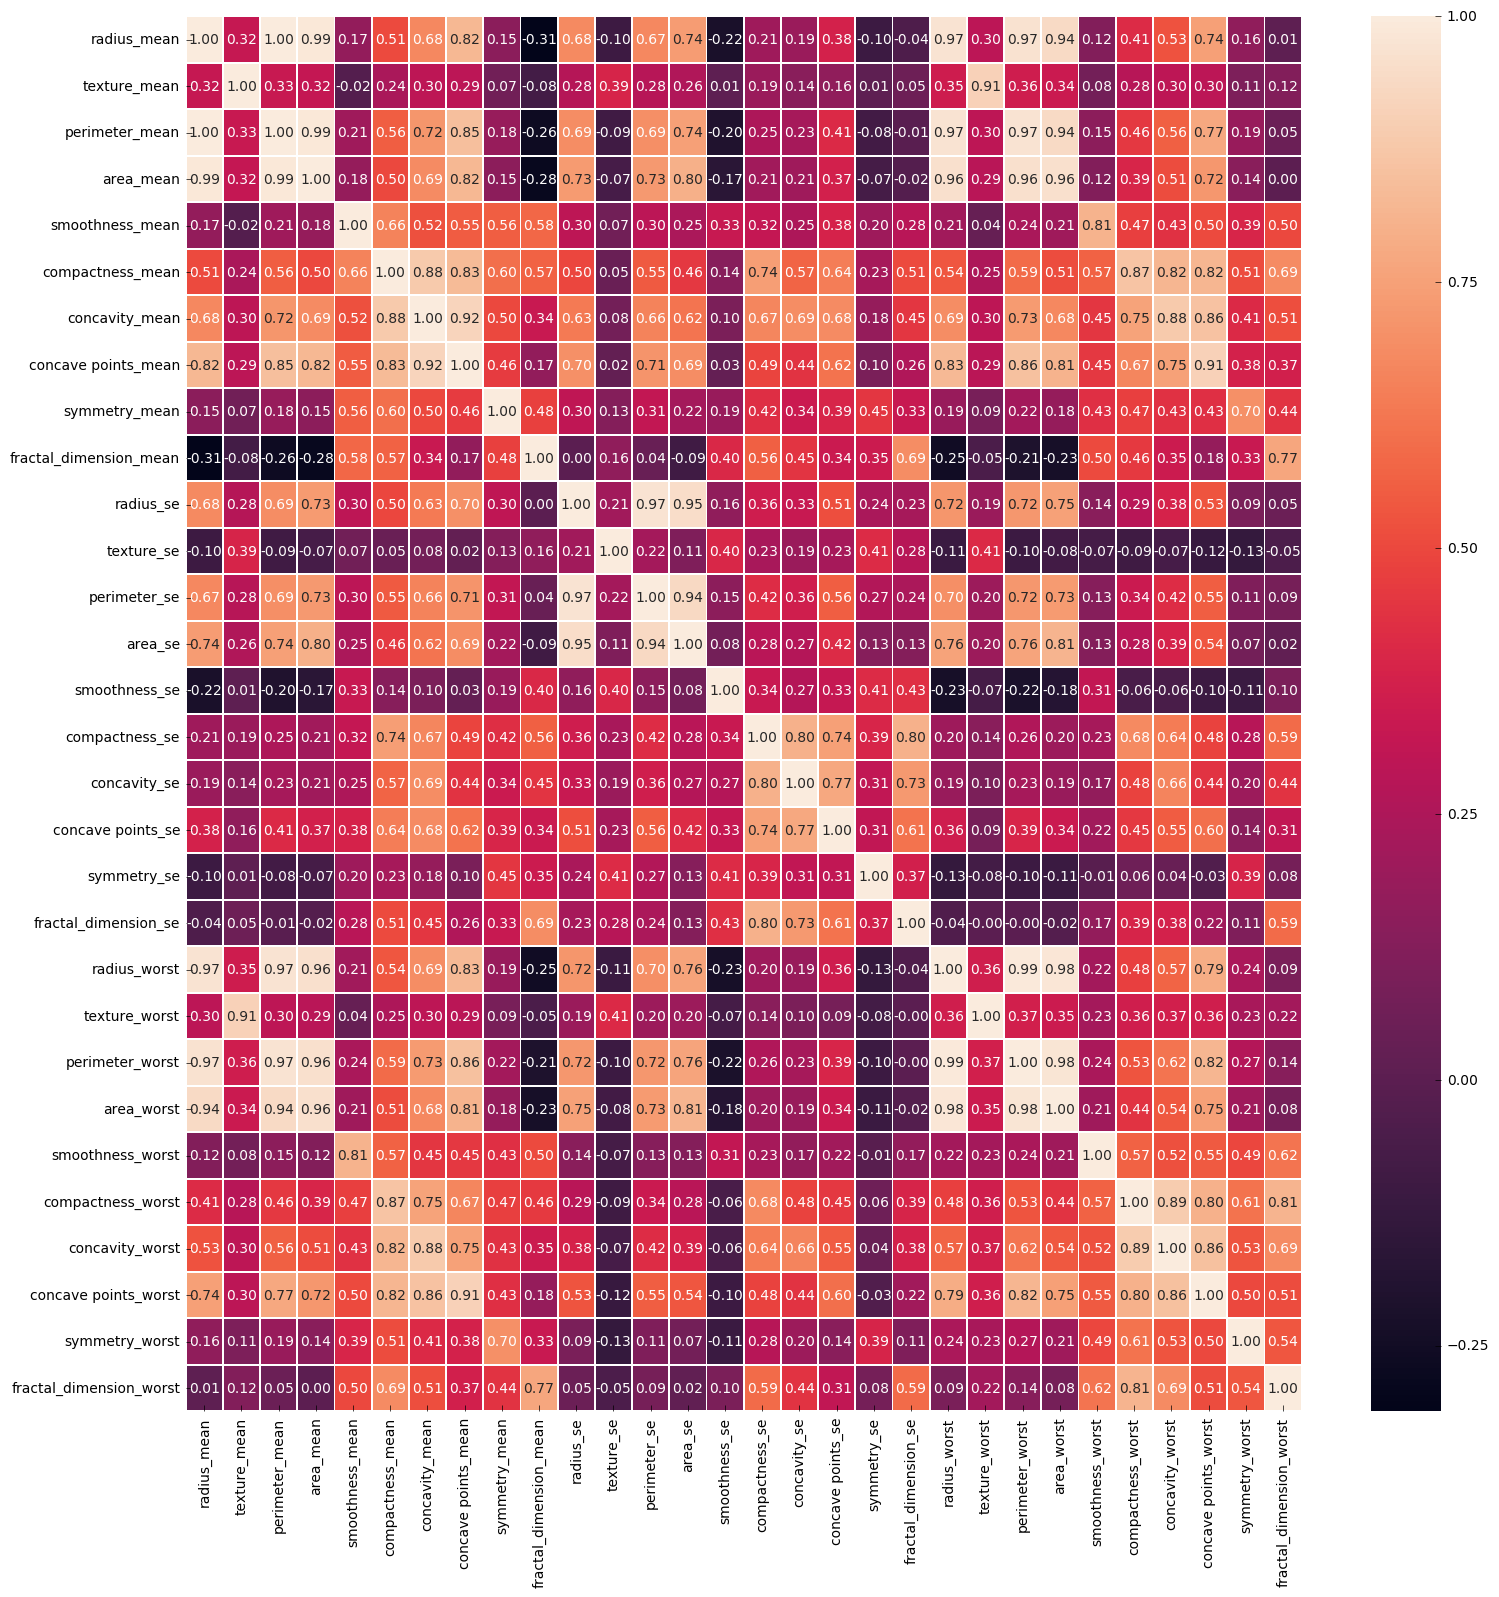

In [46]:
plt.show()

## Feature Selection

1) Feature selection with correlation and random forest classification
As it can be seen in map heat figure **radius_mean**, **perimeter_mean** and **area_mean** are correlated with each other so we will use only **area_mean**.

**Compactness_mean**, **concavity_mean** and **concave points_mean** are correlated with each other. Therefore I only choose **concavity_mean**. Apart from these, **radius_se**, **perimeter_se** and **area_se** are correlated and I only use **area_se**. **radius_worst**, **perimeter_worst** and **area_worst** are correlated so I use **area_worst**. **Compactness_worst**, **concavity_worst** and **concave points_worst** so I use **concavity_worst**. **Compactness_se**, **concavity_se** and **concave points_se** so I use **concavity_se**. **texture_mean** and **texture_worst** are correlated and I use **texture_mean**. **area_worst** and area_mean are correlated, I use area_mean

In [47]:
corrDrop = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
X_1 = X.drop(corrDrop,axis = 1 )        # do not modify x, we will use it later 
X_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [48]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)


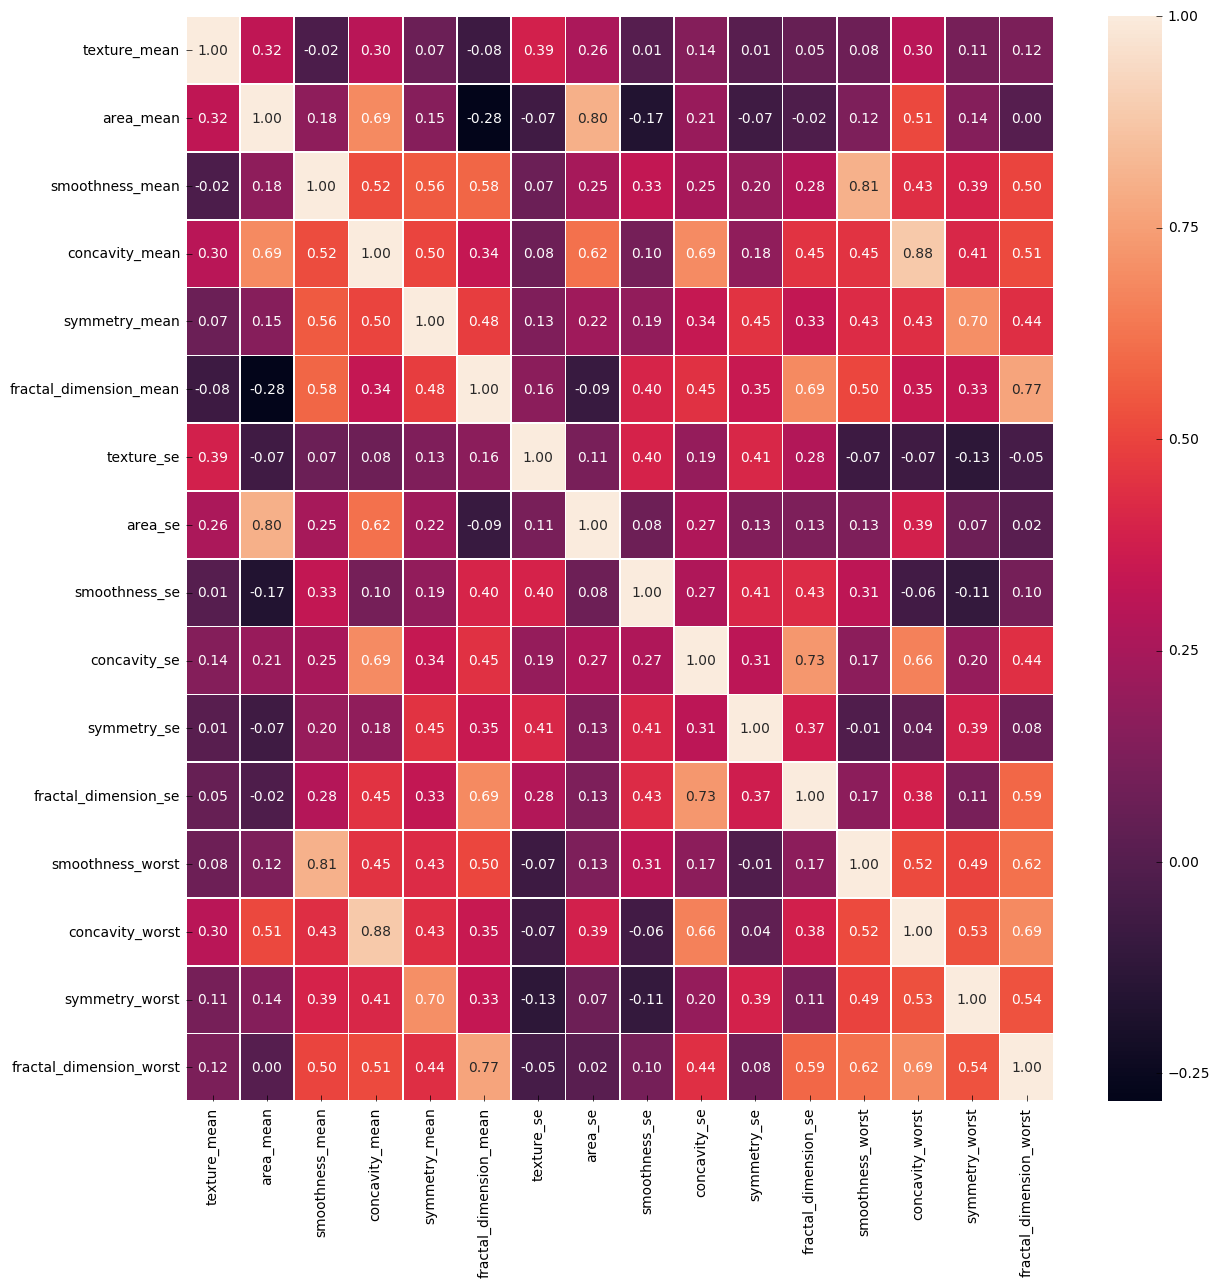

In [49]:
plt.show()

## Part II Modeling

Now that we have remove  the features that are highly correlated, we can start modeling. First of all, we need to split the dataset into training and testing datasets.

## 1. K-nearest Neighbors Classifier

In [50]:
# Change the catergorical series to numerical 
y_2 = pd.get_dummies(y)

In [51]:
from sklearn.cross_validation import train_test_split
X_2=X_1.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.25, random_state=0)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier()

[ 0.831  0.753  0.866  0.814  0.864  0.845  0.876  0.864  0.88   0.866
  0.88   0.873  0.885  0.88   0.89   0.885  0.89   0.883  0.887  0.878
  0.885  0.88   0.88   0.88   0.88   0.88   0.88   0.878  0.88   0.876
  0.878  0.876  0.878  0.878  0.88   0.873  0.883  0.873  0.885  0.876
  0.887  0.878  0.885  0.878  0.883  0.88   0.883  0.88   0.885]


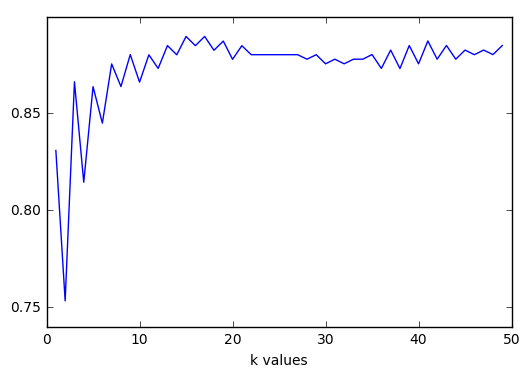

0.889700996678


In [53]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,)
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="blue")
plt.xlabel('k values')
plt.show()
print(max(k_scores))

In [54]:
from sklearn.grid_search import GridSearchCV
k_range=list(range(1,50))
param_grid=dict(n_neighbors=k_range)
grid_knn=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy",n_jobs=-1)
print("# Tuning hyper-parameters for %s" % "accuracy")
grid_knn.fit(X_train,y_train)
print(grid_knn.best_params_)
print(np.round(grid_knn.best_score_,3))

# Tuning hyper-parameters for accuracy
{'n_neighbors': 15}
0.89


## 2 Random Forest classifier

Accuracy is:  0.970760233918


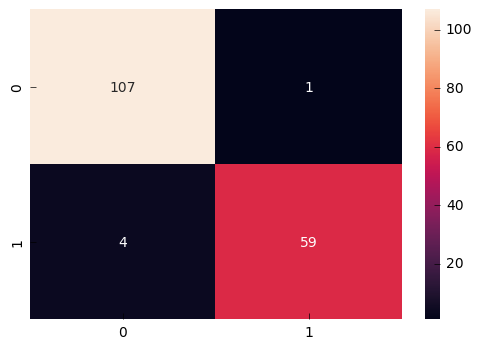

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

### Univariate feature selection and random forest classification
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [75]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [  6.06916433e+01   3.66899557e+04   1.00015175e-01   1.30547650e+01
   1.95982847e-01   3.42575072e-04   4.07131026e-02   6.12741067e+03
   1.32470372e-03   6.92896719e-01   1.39557806e-03   2.65927071e-03
   2.63226314e-01   2.58858117e+01   1.00635138e+00   1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Best 5 feature to classify is that area_mean, area_se, texture_mean, concavity_worst and concavity_mean. So lets se what happens if we use only these best scored 5 feature.

Accuracy is:  0.941520467836


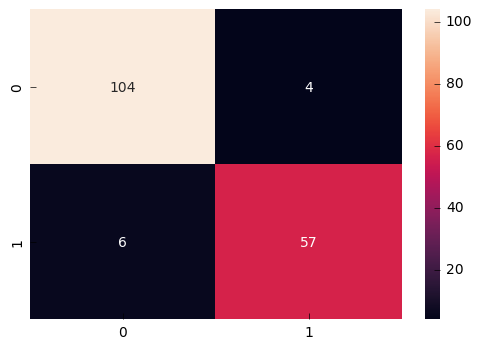

In [94]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")
plt.show()

Use the "best 5" is not as good as use all features.

## Feature Importance Plot

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature).

Feature ranking:
1. feature 7 (0.318991)
2. feature 1 (0.204769)
3. feature 3 (0.125889)
4. feature 14 (0.068691)
5. feature 12 (0.061305)
6. feature 0 (0.058106)
7. feature 13 (0.042357)
8. feature 2 (0.024439)
9. feature 4 (0.021677)
10. feature 11 (0.014250)
11. feature 6 (0.012476)
12. feature 8 (0.012315)
13. feature 10 (0.012173)
14. feature 5 (0.008364)
15. feature 15 (0.007453)
16. feature 9 (0.006746)


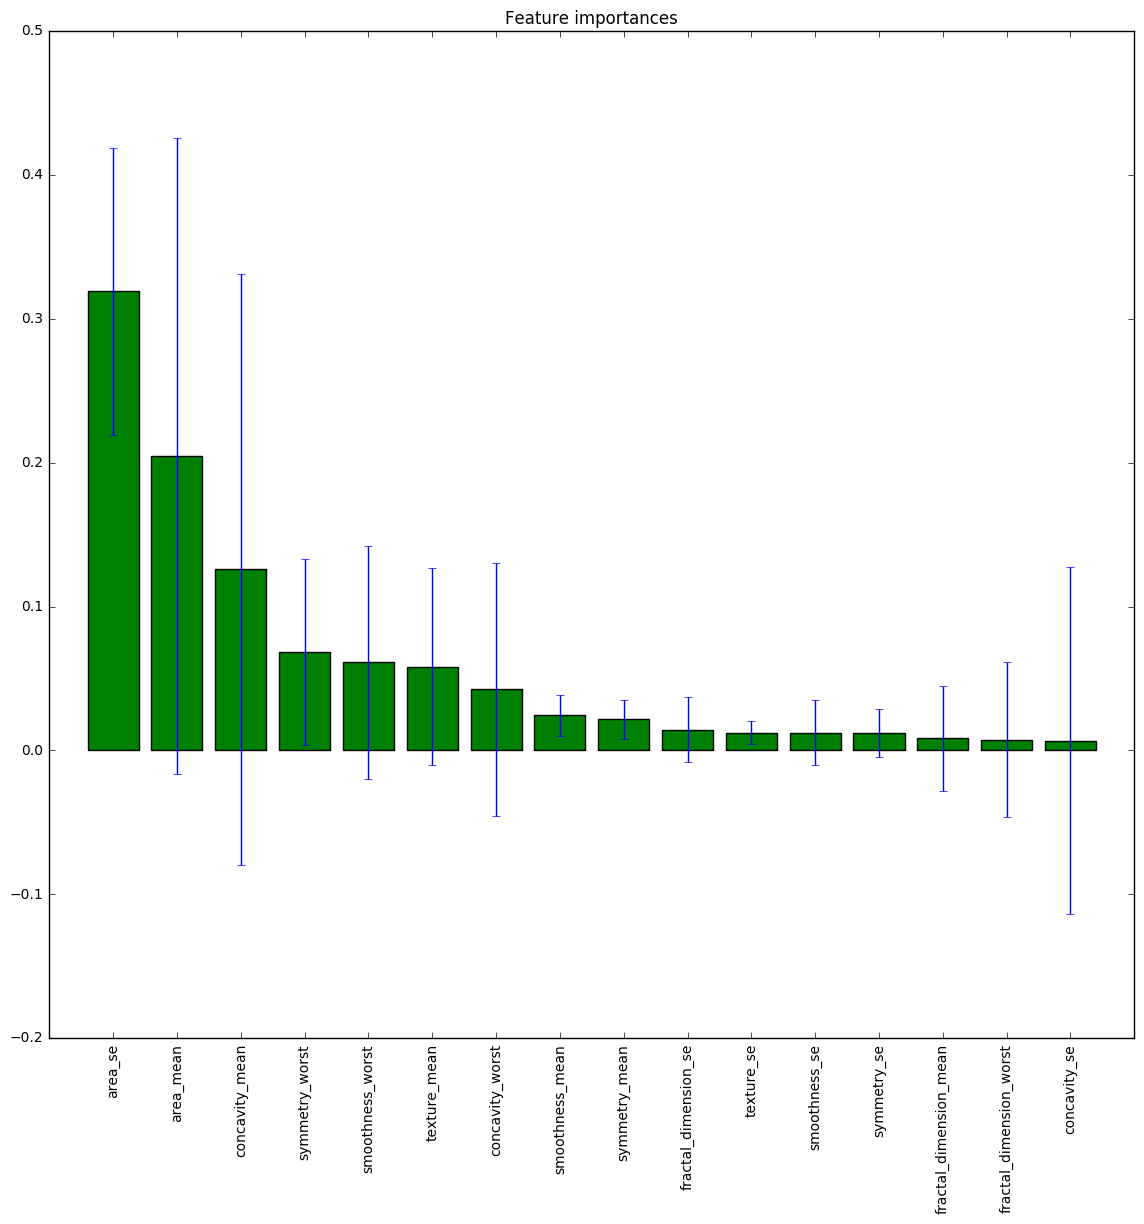

In [95]:
clf_rf_3 = RandomForestClassifier()      
clr_rf_3 = clf_rf_3.fit(x_train,y_train)
importances = clr_rf_3.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()